In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx
import hypernetx as hnx
import pydot
from networkx.drawing.nx_pydot import graphviz_layout
from cycler import cycler

# Chordal Graphs

Recall that a **chordal graph** is a graph is a graph where every cycle of 4 or more has a **chord**, an edge that joins two vertices and is not itself an edge of the cycle.

Chordal graphs were studied in 1961 by Dirac who called them *rigid circuit graphs*. Over the years chordal graphs have been well studied and are one of the most important and intersting family of graphs because of their charactersitic and properties. Many alogirhtmic problems that are NP-complete can be completed in polynomial time for chordal graphs making them extremely important and desirable from an algorithmic graph theory stand point.

There are also many applications of chordal graphs from databases to computational biology and we will explore some of these applications throughout this section. 

# Chordal Graph Characteristics

## Interval Graphs
A **interval graph** is an  <a href="IntroToGraphTheory.ipynb">intersection graph</a> for a family of intervals on the real line. 

***Theorem: Every interval graph is a chordal.***

**Proof:** We will use proof by contradiction by assuming that our interval graph is not chordal. Let $\mathcal{I}$ be a family of intervals. Let $v_j$ be the vertex that corresponds with the interval $I_j$. If our interval graph is not chordal then there exists a cycle of length 4 or more such that there does not exist a chord. Let our cycle with no chord be $\{v_0, v_1, \dots, v_k = v_0\}$ where $k \geq 4$. Recall that for an edge to connect two distinct vertices the corresponding intervals must intersect, that is for $v_{j}, v_{j+1}$, $I_j \cap I_{j+1} \neq \emptyset$. In order for us to not have a chord it must be true that $I_j \cap I_{j+2} = \emptyset$ otherwise there would exist an edge $\{v_j, v_{j+1}\}$ contradicting the fact that our cycle is chord less. 
	
Let $p_j \in I_{j-1} \cap I_{j}$. Observe that each $p_j$ must be unique since nonconsecutive intervals have an empty intersection. We will now proceed by inducting over $p_j$. Without loss of generality let it be true that $p_j < p_{j+1}$. We want to show that if $p_j < p_{j+1}$ then $p_{j+1} < p_{(j+1)+1} = p_{j+2}$. Observe that if $p_{j+2} < p_{j+1}$ then $(p_{j+2}, p_{j+1}) \subseteq I_{j+3}$ and $(p_{j}, p_{j+1}) \subseteq I_{j+1}$ which contradicts that fact that nonconsecutive intervals do not intersect. So it must be true that $p_{j+1} < p_{j+2}$. It then follows by induction that $p_0 < p_1 < p_2 < \dots < p_{k-1}$. Note that this means that it is impossible for $I_0$ and $I_{k-1}$ to intersect which contradicts the fact that $\{v_0, v_{k-1}\}$ is an edge. In other words it contradicts the fact that we have a cycle. (QED)

Below is a family of intervals and its interval graph.

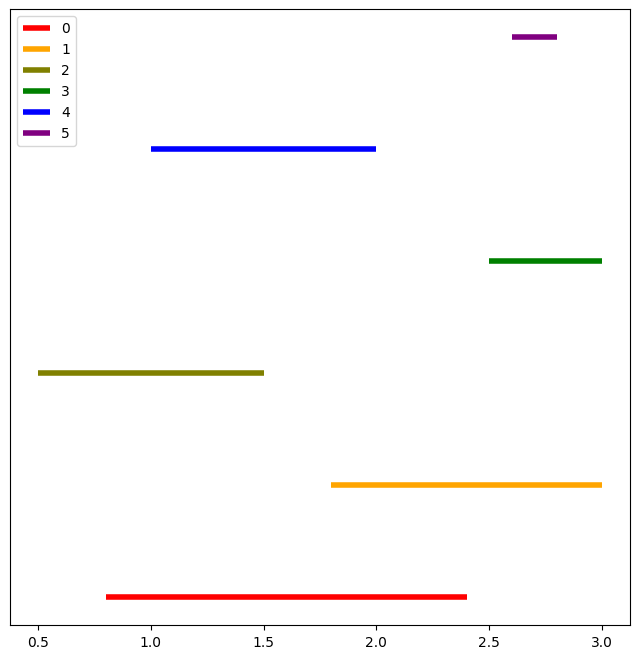

In [3]:
# Family of intervals

intervals = [(0.8, 2.4), (1.8, 3), (0.5, 1.5), (2.5, 3), (1, 2), (2.6, 2.8)]

num_intervals = len(intervals)
viridis = ['Red', 'Orange', 'Olive', 'Green', 'Blue', 'Purple']

fig, ax = plt.subplots()
for idx, (min_int, max_int) in enumerate(intervals):
  ax.hlines(y=idx, xmin=min_int, xmax=max_int, colors=viridis[idx], label=idx, lw=4)
ax.legend(loc='upper left')
plt.yticks([], [])

plt.savefig('intervalFamily.png')


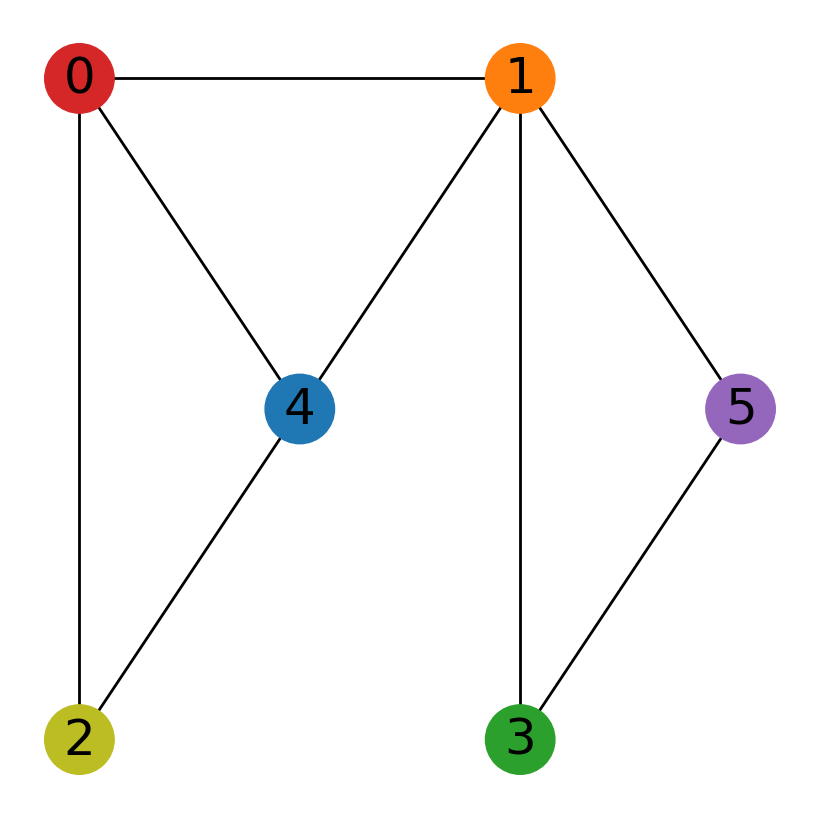

In [4]:
# Interval graph for the family of intervals above

edges = [[0, 1], [0, 2], [0, 4], [1, 3], [1, 4], [1, 5], [2, 4], [3, 5]] # Where the edges are (i.e. (v_1, v_2))
G = nx.Graph() # Generate an empty graph 
#G.add_edges_from(edges) # Add edges to our graph 

G.add_node(0, nodetype='tab:red', level=0)
G.add_node(1, nodetype='tab:orange', level=2)
G.add_node(2, nodetype='tab:olive', level=0)
G.add_node(3, nodetype='tab:green', level=2)
G.add_node(4, nodetype='tab:blue', level=1)
G.add_node(5, nodetype='tab:purple', level=3)


G.add_edges_from(edges) # Add edges to our graph 
pos = nx.multipartite_layout(G, subset_key="level") # Position layout of G

colors = [u[1] for u in G.nodes(data="nodetype")]

# Draw the graph
nx.draw(
    G, pos, edge_color='black', width=2, linewidths=1,
    node_size=2500, font_size = 36, node_color=colors, alpha=1,
    labels={node: node for node in G.nodes()} 
)

plt.savefig('intervalFamilyIntersectionGraph.png')

## Minimal Seperators



## Trees

Recall that a tree is a type of undirected graph where two vertices are connected by exactly one path. Like subgraphs we can have subtrees and we can have look at intersections of subtrees. This leads to an interesting characterization of chordal graphs.

**Theorem:** The intersection graph of a family of subtrees is chordal.

**Proof:** 

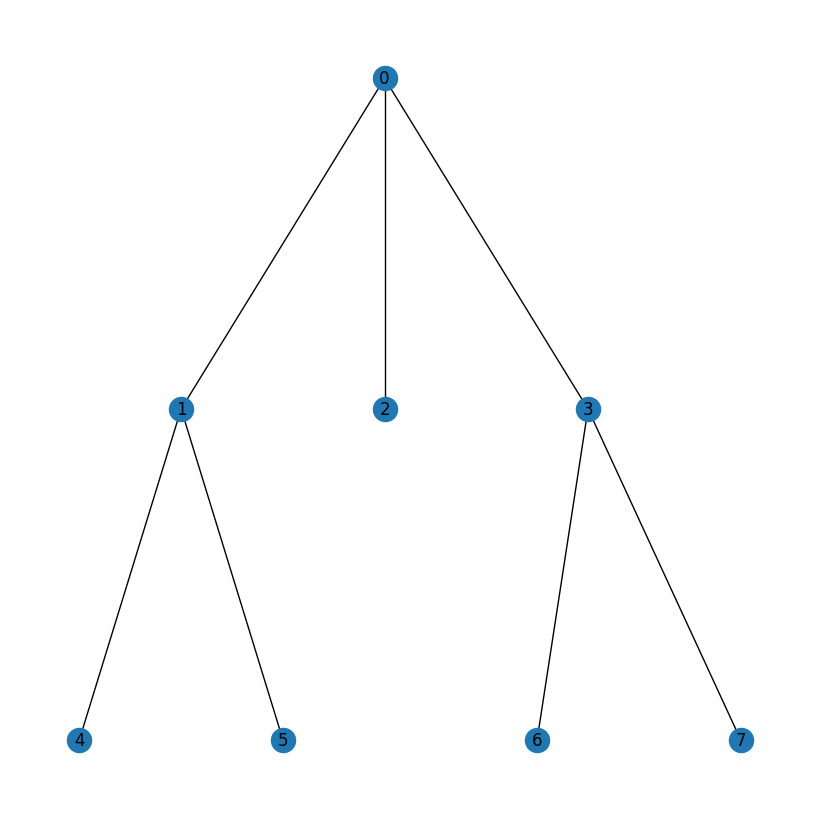

In [5]:
edges = [[0, 1], [0, 2], [0, 3], [1, 4], [1, 5], [3, 6], [3, 7]]

T = nx.Graph()
T.add_edges_from(edges)

pos = graphviz_layout(T, prog="dot")
nx.draw(T, pos, with_labels=True)
plt.show()

# Chordal Graphs and Databases

Chordal graphs have a heavy application in databases. As we saw earlier there are ways to define a hypergraph as a chordal graph. This is an important fact that is often utilized in database theory because if we are able to represent a database scheme as a hypergraph, more specifically an acyclic hypergraph, we are able to use characteristics of chordal graphs in order to query through our data. Below is an example of a database scheme and its hypergraph representation. 

<img src="Diagrams/dataScheme.png">